In [1]:
from importlib import import_module
import tensorflow as tf
import keras
from keras.api._v2 import keras as KerasAPI
keras: KerasAPI = import_module("tensorflow.keras")
print(tf.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils import plot_model

from keras.utils import load_img
from keras.utils import img_to_array

import os

from sklearn.preprocessing import LabelEncoder

2.10.0


In [2]:
class_l_r_to_d = {0:0, 1:1, 2:2, 4:3, 9:4}
class_l_d_to_r = {0:0, 1:1, 2:2, 3:4, 4:9}

In [3]:
def label_encoding(df):
    df[df.columns[-1]] = LabelEncoder().fit_transform(df.iloc[:,-1])
    return df

def normalizing_data(df):
    temp = df[df.columns[-1]]
    df = df/255
    df[df.columns[-1]] = temp
    return df

# plt.figure(figsize=(7, 10))
def data_visualize(df):
  np.random.seed(random_state_global)
  plt.figure(figsize=(12, 12))
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    rand_index = np.random.choice(range(len(df)))
    plt.imshow(tf.reshape(df.iloc[rand_index,:-1], shape=(28,28)), cmap=plt.cm.binary)
    plt.title(f'{class_l_d_to_r[df.iloc[rand_index,-1]]}')
    # plt.axis(False)
  plt.tight_layout()

In [5]:
df_train = pd.read_csv(path+'df_train.csv', dtype='float32')
df_valid = pd.read_csv(path+'df_valid.csv', dtype='float32')
df_test = pd.read_csv(path+'df_test.csv', dtype='float32')

print('df_train:', df_train.groupby(['784']).count().iloc[:,-1].to_dict())
print('df_valid:', df_valid.groupby(['784']).count().iloc[:,-1].to_dict())
print('df_test:', df_test.groupby(['784']).count().iloc[:,-1].to_dict())
print()

print(f'Initial Data Range: {min(df_train.iloc[:,:-1].min())} to {max(df_train.iloc[:,:-1].max())}')

df_train = label_encoding(normalizing_data(df_train))
df_valid = label_encoding(normalizing_data(df_valid))
df_test = label_encoding(normalizing_data(df_test))
print(f'Final Data Range: {min(df_train.iloc[:,:-1].min())} to {max(df_train.iloc[:,:-1].max())}')
print('Label Encoded')

print('Train Data',df_train.shape)
print('Valid Data',df_valid.shape)
print('Test Data' ,df_test.shape)

df_train: {0.0: 2277, 1.0: 2277, 2.0: 2277, 4.0: 2277, 9.0: 2277}
df_valid: {0.0: 759, 1.0: 759, 2.0: 759, 4.0: 759, 9.0: 759}
df_test: {0.0: 759, 1.0: 759, 2.0: 759, 4.0: 759, 9.0: 759}

Initial Data Range: 0.0 to 255.0
Final Data Range: 0.0 to 1.0
Label Encoded
Train Data (11385, 785)
Valid Data (3795, 785)
Test Data (3795, 785)


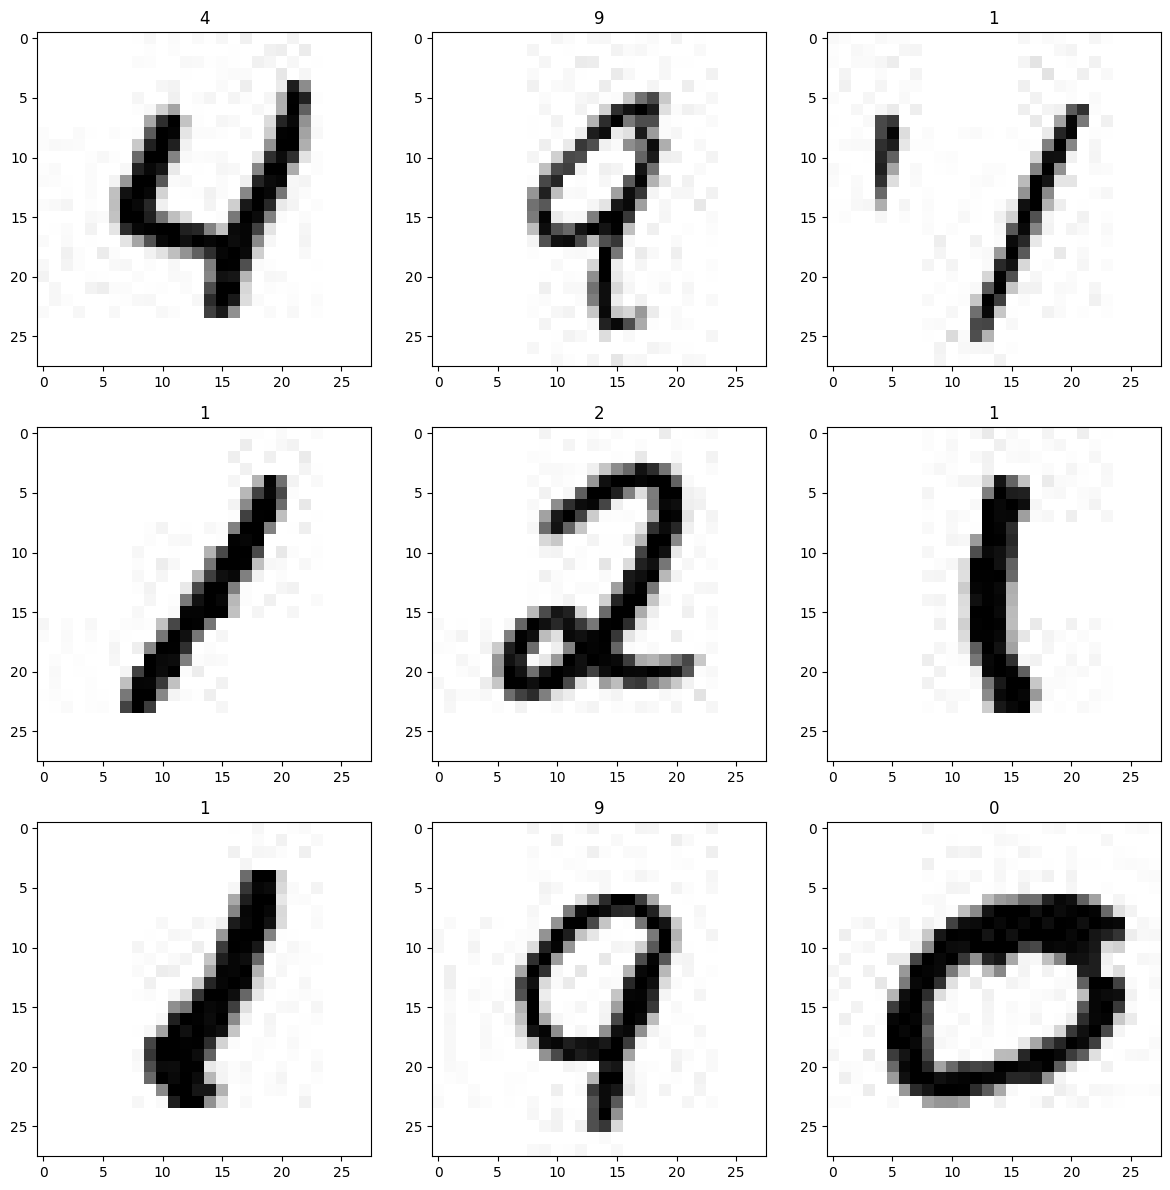

In [6]:
data_visualize(df_train)

In [7]:
# Import label encoder
ll = [9,9,4,0,0,1,2]
print(LabelEncoder().fit_transform(ll))

print(ll)

[4 4 3 0 0 1 2]
[9, 9, 4, 0, 0, 1, 2]
